In [1]:
import pandas as pd

df = pd.read_csv('CarPrice_Assignment.csv')  # Adjust filename if needed
print(df.head())


   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [4]:
# Data pre-processing
# Drop unnecessary columns
df = df.drop(['CarName'], axis=1)

# Convert categorical columns
df = pd.get_dummies(df, drop_first=True)

# Check for nulls
print(df.isnull().sum())


car_ID                   0
symboling                0
wheelbase                0
carlength                0
carwidth                 0
carheight                0
curbweight               0
enginesize               0
boreratio                0
stroke                   0
compressionratio         0
horsepower               0
peakrpm                  0
citympg                  0
highwaympg               0
price                    0
fueltype_gas             0
aspiration_turbo         0
doornumber_two           0
carbody_hardtop          0
carbody_hatchback        0
carbody_sedan            0
carbody_wagon            0
drivewheel_fwd           0
drivewheel_rwd           0
enginelocation_rear      0
enginetype_dohcv         0
enginetype_l             0
enginetype_ohc           0
enginetype_ohcf          0
enginetype_ohcv          0
enginetype_rotor         0
cylindernumber_five      0
cylindernumber_four      0
cylindernumber_six       0
cylindernumber_three     0
cylindernumber_twelve    0
c

In [5]:
df.shape

(205, 45)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select top n most correlated features with price
top_n = 10
corr = df.corr()
top_features = corr['price'].abs().sort_values(ascending=False).head(top_n).index



In [12]:
# Create a subset correlation matrix
top_corr_matrix = df[top_features].corr()

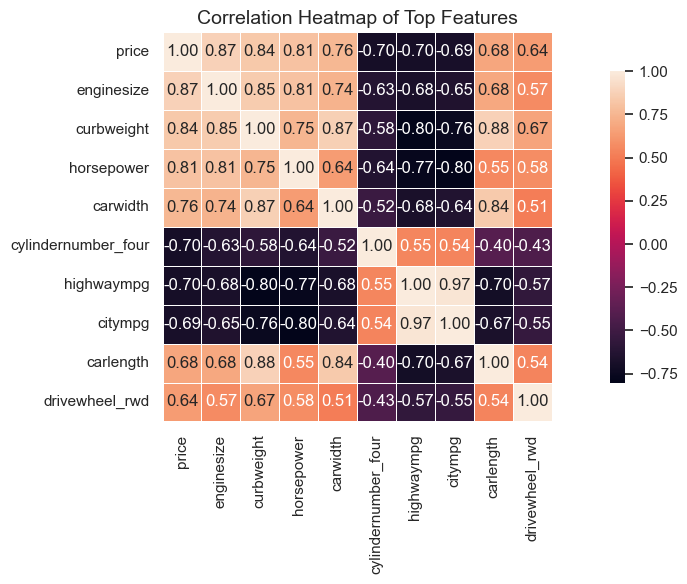

In [16]:
# Set figure size and styling
plt.figure(figsize=(12, 6))
sns.set(font_scale=1.0)
sns.heatmap(top_corr_matrix, annot=True, fmt=".2f", linewidths=0.5, square=True, cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap of Top Features', fontsize=14)
plt.tight_layout()
plt.show()

In [18]:
#Prepare for modeling
X = df.drop('price', axis=1)
y = df['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")


R² Score: 0.901


In [22]:
lr.score(X_test, y_test)

0.9005298423323501

In [20]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

# Ridge
ridge = Ridge(alpha=1.0)
ridge_scores = cross_val_score(ridge, X, y, cv=5, scoring='r2')
print("Ridge CV R²:", ridge_scores.mean())

# Lasso
lasso = Lasso(alpha=0.1)
lasso_scores = cross_val_score(lasso, X, y, cv=5, scoring='r2')
print("Lasso CV R²:", lasso_scores.mean())


Ridge CV R²: 0.45873326091463423
Lasso CV R²: 0.3186395737008584


c:\Users\srira\AI\Analytics\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.872e+08, tolerance: 1.003e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\srira\AI\Analytics\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.351e+08, tolerance: 7.207e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\srira\AI\Analytics\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali